In [2]:
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

In [3]:
x = np.linspace(0, 120, 13)
coef = np.pi/180.
x_arg = coef * x
x = 1 - np.cos(coef * x)
y_arg = np.array([1012, 998, 921, 821, 771, 659, 578, 525, 472, 426, 392, 367, 330], dtype = float)
y = 1/y_arg

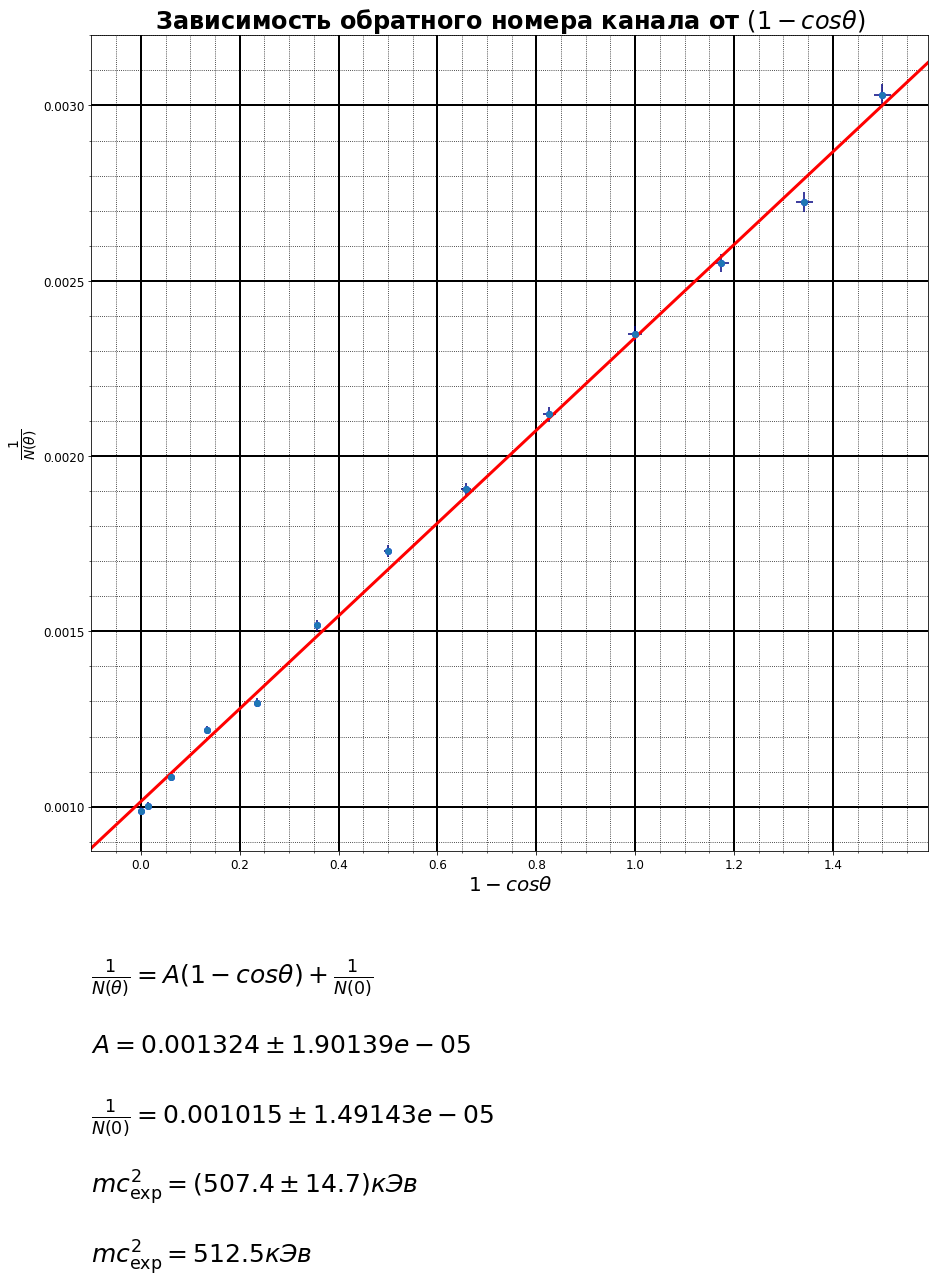

In [9]:
plt.plot(x, y, "bo")
xerr = np.abs(np.sin(x)) * coef
yerr = np.abs(y) * 0.01
plt.title("Зависимость обратного номера канала от "r'$(1-cos\theta)$', fontsize = 24, fontweight = 'bold')
ax = plt.gca()
ax.set_xlabel(r'$1-cos\theta$', fontsize = 20)
ax.set_ylabel(r'$\frac{1}{N(\theta)}$', fontsize = 20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid()
plt.errorbar(x, y, xerr = xerr, yerr = yerr, fmt='o', ecolor='navy')
ax.set_xlim(-.1)
ax.set_ylim(None, .0032)
ax.minorticks_on()
ax.grid(which='major',
        color = 'k', 
        linewidth = 2)
ax.grid(which='minor', 
        color = 'k', 
        linestyle = ':')
model = sm.OLS(y, sm.add_constant(x))
res = model.fit()
params = res.params[::-1]
error = res.bse[::-1]
straight_line = np.poly1d(params)
inter = np.linspace(-1, 1.8, 100)
plt.plot(inter, straight_line(inter), "r", linewidth = '3')
fig = plt.gcf()
fig.set_size_inches(15, 15)
plt.text(-0.1, 0.0005, r'$\frac{1}{N(\theta)} = A(1-cos\theta) + \frac{1}{N(0)}$', fontsize = 25)
plt.text(-0.1, 0.0003, r'$A = %f \pm %g $' % (params[0], error[0]), fontsize = 25)
plt.text(-0.1, 0.0001, r'$\frac{1}{N(0)} = %f \pm %g $' % (params[1], error[1]), fontsize = 25)
n0 = 1 / params[1]
Gn0 = error[1] / (params[1] ** 2)
gamma = params[0] + params[1]
Ggamma = (error[0] ** 2 + error[1] ** 2) ** .5
n90 = 1/gamma
Gn90 = Ggamma / (gamma ** 2)
mc2 = 662 * n90 / (n0 - n90)
Gzn = (Gn0 ** 2 + Gn90 ** 2) ** .5
Gmc2 = (((Gn90/n90) ** 2 + (Gzn / (n0 - n90)) ** 2) ** .5 ) * mc2
plt.text(-0.1, -0.0001, r'$m{c}^2_\exp = (%.1f \pm %.1f)кЭв$' % (mc2, Gmc2), fontsize = 25)
plt.text(-0.1, -0.0003, r'$m{c}^2_\exp = 512.5 кЭв$', fontsize = 25)
plt.show()
fig.savefig('test.png')

In [214]:
print(n0, Gn0)
print(n90, Gn90, Gn90/n90, Gzn)
print(mc2, Gmc2)

985.6264116794634 14.488600834700962
427.6601606994618 4.419678194547337 0.010334556736168057 15.147709711063737
507.3981193052317 14.739204005458012
